# Image Classification with Deep Neural Networks

In our regression example you have seen how to train a neural network with fast.ai.

We will do the same here, but this time we will classify images, something Deep Neural Networks are often doing much better than any 'traditional' machine learning algorithms.

We will still start slow and use the MNIST dataset before going into using larger more complex and colorful images.

Run the code below to install and import all necessary packages.

In [1]:
!pip install -Uqq fastbook
from fastai.vision.all import *
import matplotlib.pyplot as plt

     |████████████████████████████████| 727kB 5.6MB/s 
     |████████████████████████████████| 51kB 6.0MB/s 
     |████████████████████████████████| 1.2MB 20.0MB/s 
     |████████████████████████████████| 194kB 34.0MB/s 
     |████████████████████████████████| 61kB 8.0MB/s 


## Getting our data
Here on colabs your directory will be newly set up every time you open the notebook. If you wish to permanently store inputs and outputs you can connect your colabs workspace to Google Drive.

For now we don't need any permanent storage so we will just use the current working directory.


Using the fast.ai `untar_data() ` function we download and unzip the MNIST dataset for our classification task.

In [2]:
path = untar_data(URLs.MNIST) #this will download and extract the dataset , it may take a while (163 MB)

Loading the data may take a second.In the meantime you can read about the dataset [here](http://yann.lecun.com/exdb/mnist/)

Once the dataset it loaded we make it's directory our base path for easier access.
You can check any subfolder of the path object with `.ls()`.

In [3]:
Path.BASE_PATH = path

path.ls()

(#2) [Path('testing'),Path('training')]

#### NOW YOU 
Use the `.ls()` method to find out which subfolder are in the 'training' folder.

In [4]:
(path/"training").ls() #NOW YOU PART

(#10) [Path('training/5'),Path('training/6'),Path('training/2'),Path('training/3'),Path('training/0'),Path('training/1'),Path('training/8'),Path('training/7'),Path('training/9'),Path('training/4')]

You can see that within the training folder we have a folder for each digit.
The folder name corresponds to the label of the images. This is something we can use when preparing our data for training.

Lets access one folder and open one image to see what they look like.

#### NOW YOU
create a 'sevens' object that contains the paths to all subfolders of the '7' folder in the 'training' folder.

In [5]:
sevens = (path/"training"/"7").ls() #NOW YOU PART
sevens

(#6265) [Path('training/7/30538.png'),Path('training/7/38026.png'),Path('training/7/58725.png'),Path('training/7/1154.png'),Path('training/7/4164.png'),Path('training/7/40937.png'),Path('training/7/46356.png'),Path('training/7/22052.png'),Path('training/7/53074.png'),Path('training/7/15754.png')...]

As we might expect, it's full of image files. Let’s take a look at one now. Here’s an image of a handwritten number 7, taken from the famous MNIST dataset of handwritten numbers:

In [6]:
image_7_path = sevens[0]
image_7 = Image.open(image_7_path)
image_7

Here we are using the `Image` class from the *Python Imaging Library* (PIL), which is the most widely used Python package for opening, manipulating, and viewing images. Jupyter knows about PIL images, so it displays the image for us automatically.

In a computer, everything is represented as a number. To view the numbers that make up this image, we have to convert it to a *NumPy array* or a *PyTorch tensor*. For instance, here's what the image looks like, converted to a NumPy array:

In [7]:
np.array(image_7)

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  

You can see that the background white pixels are stored as the number 0, black is the number 255, and shades of gray are between the two. The entire image contains 28 pixels across and 28 pixels down, for a total of 784 pixels. (This is much smaller than an image that you would get from a phone camera, which has millions of pixels, but is a convenient size for our start in computer vision. From here it is not hard to build up to bigger, full-color images.)



Our NN will work best with values between 0-1. One way to convert our image data into this format is by dividing the current values by 255. Numpy's array math makes this a quick and powerful operation.

In [8]:
np.array(image_7)/255

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

For some frameworks this step would be necessary and you'd have to perform it for the whole dataset before training.
fast.ai integrates this step in the dataloading process through the DataLoaders, so we won't do it manually here. But you may want to keep this in mind if you work with other frameworks.

## Loading and preparing our data

In our regression example you saw one possibility to load data.
Here we use a more general appraoch (although fast.ai provides one similiar to the TabularDataLoaders for images).

We first create a DataBlock. We specify which blocks it contains; one holds our image data and one the categories/labels. We then tell our DataBlock how to retrieve the images, then how to split the data into training and validation split and finally how to get the labels. In our case it's relatively straightforward: The DataBlock gets the images from any path we pass to it later, it will randomly split the data 80/20 and get the label from the "parent" folder, so the folder that contains the image.

If any of this is still not 100% clear, stick with us. It's normal, I too struggled with it the very first time I saw it  and if you want to understand it further ask in Slack, go to fast.ai or join the next AI track.

In [9]:
mnist = DataBlock(
        blocks=(ImageBlock, CategoryBlock), 
        get_items=get_image_files, 
        splitter=RandomSplitter(valid_pct = 0.2),
        get_y=parent_label)

Now that we have our DataBlock object we can load the data from the 'training' folder. We use `.dataloaders()` and pass it the path as well as `bs = 32` which is our batch size. That means for every step our optimizing algorithm takes to adjust the networks weights it will look at 32 examples from our data.

#### NOW YOU
Think about why we might use only some pictures at every step and not the whole training set. (Hint: (Batch) Gradient Descent, Stochastic Gradient Descent, Mini-Batch Gradient Descent)


Go to the fast.ai documentation and find a way to load and prepare our data without specifying the DataBlock.


In [10]:
dls = mnist.dataloaders(path/"training", bs = 32)
#dls = ImageDataLoaders.from_folder(path,train = "training", valid_pct=0.2, bs = 32, size = 28) #the short way going around the DataBlock

#### NOW YOU
Use the method to show a batch (or part of it) to view the loaded images. This is a good way to check whether everything worked during the data loading and whether the data looks as expected.

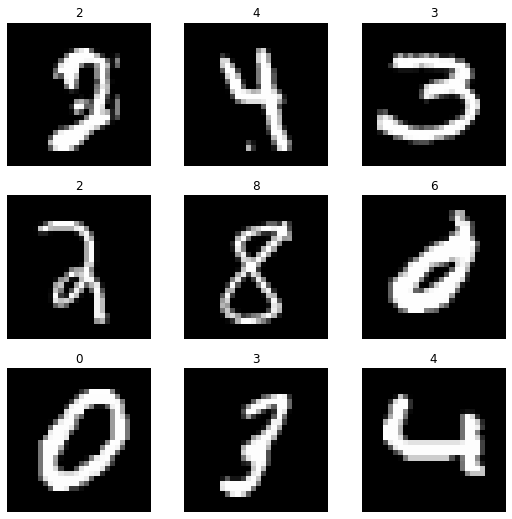

In [11]:
dls.show_batch() #NOW YOU PART

## Training the model

#### NOW YOU
Fill in the code below with what you have learned in the regression example. The only thing set for you are the model and the `pretrained=` argument. You need to specify the dataloaders and metrics you want to use. You can pass multiple metreics, whatever metrics you use are calculated on the validation set and should include accuracy for our example. 

In [12]:
learner = cnn_learner(dls,resnet18,pretrained = False,metrics = accuracy)
#______ = cnn_learner(___,resnet18,pretrained = False, _________________)

#### NOW YOU
Let's train our model. We will again use the one cycle method you've seen in our regression example. Train for 2 epochs. 

If you feel like this is taking very long (>5min per epoch) scroll down and learn what you can do about it.

In [13]:
learner.fit_one_cycle(2)#NOW YOU PART

epoch,train_loss,valid_loss,accuracy,time
0,0.170064,0.103258,0.970333,02:19
1,0.045700,0.030349,0.991250,02:19


What you see above is the training process, as the model we are using is quite large it will take a while. But if we would wait for this long every time we trained a model on data as "simple" as 28x28 pixel black and white images we wouldn't get very far.

This is were the GPU comes in. GPU stands for Graphics Processing Unit, sometimes referred to as Graphics Card ord Graphics Chip. You may know that many video games require such hardware. It turns out that the computations we need to train our model are similar to those needed to display high quality 3D graphics. Deep learning thus usually requires GPU's or even TPUs (a special Tensor Processing Unit made for deep learning and similar operations).

Here in Google Colabs you can use a powerful GPU for free! 

*Note* Even if you have a Nvidia GPU on your local machine setting up the deep learning functionalities can be a little involved. We **highly** recommend you stick with Colabs first to learn about deep learning before you spend hours (potentially) to set up your local machine.

To use a GPU go to 'Runtime', 'Change runtime type' and select the **GPU** as the Hardware accelerator. The notebook will reset and runtime will start again, which means you will have to start from the beginning. So keep in mind to select the GPU **before** you run the first lines of code in your next notebook.

Now run the notebook again and hopefully you can experience a serious boost in performance.

*Note* This performance boost applies to large neural networks, using a GPU might not benefit other ML algorithms in the same way.

## That's a lot of accuracy for only "seeing" every image twice

As you can see we reach very high accuracy on the validation set with just two epochs. 

The MNIST dataset is pretty "easy" for a large neural network that was build for image classification such as resnet18. (BTW if you think 18 layers is deep, check out resnet50 or resnet152)

So let's check out how it does on images that are a little larger,more colorful and a little more diverse.

Head to the next notebook to use your knowledge on harder image classification problems. Remember, GPUs and experimentation are your friend.